In [39]:
import pandas as pd
events_df = pd.read_csv(
    '../data/train/events.csv'
)
event_feature_map_df = pd.read_csv(
    '../data/train/event_feature_map.csv'
)
mortality_events_df = pd.read_csv(
    '../data/train/mortality_events.csv'
)

import etl
index_date_df = etl.calculate_index_date_helper(
    events_df, 
    mortality_events_df
)
filtered_events_df = etl.filter_events_helper(
    events_df,
    index_date_df
)
aggregated_events_df = etl.aggregate_events_helper(
    filtered_events_df,
    event_feature_map_df
).drop(['max_feature_value'], axis=1)


aggregated_events_df = aggregated_events_df.assign(
    is_dead=aggregated_events_df.patient_id.isin(mortality_events_df.patient_id)
)
aggregated_events_df

,patient_id,feature_id,feature_value,is_dead
0,19,719,0.250000,True
1,19,744,1.000000,True
2,19,784,0.333333,True
3,19,786,0.333333,True
4,19,1202,1.000000,True
5,19,1411,1.000000,True
6,19,1895,1.000000,True
7,19,2001,0.500000,True
8,19,2028,0.500000,True
9,19,2040,0.090909,True


In [40]:
print(aggregated_events_df.patient_id.nunique())
print(aggregated_events_df.feature_id.nunique())

836
2156


In [41]:
overview_df = aggregated_events_df.groupby(
    ['feature_id']
).patient_id.count().reset_index(name='patients_count').join(
    event_feature_map_df.rename({
        'idx': 'feature_id'
    }, axis='columns').set_index('feature_id'),
    on='feature_id'
).join(
    events_df[
        ['patient_id','event_id','event_description']
    ].set_index('event_id'),
    on='event_id'
)

overview_df = overview_df.assign(
    is_dead=overview_df.patient_id.isin(mortality_events_df.patient_id)
)
overview_df.sort_values(
    by=['patients_count', 'event_id'],
    ascending=False
)

,feature_id,patients_count,event_id,patient_id,event_description,is_dead
1961,2841,811,LAB3010813,13621,Leukocytes [#/volume] in Blood,False
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True
1961,2841,811,LAB3010813,14655,Leukocytes [#/volume] in Blood,True


In [42]:
eventid_isdead = overview_df[[
    'event_id', 'is_dead'
]].groupby(
    ['event_id', 'is_dead']
)[[
    'event_id', 'is_dead'
]].size().reset_index(name='count').sort_values(
    by=['event_id', 'is_dead'],
    ascending=False
)
eventid_isdead.corr()

,is_dead,count
is_dead,1.000000,0.054515
count,0.054515,1.000000


In [43]:
events_pre_acc = aggregated_events_df.join(
    event_feature_map_df.rename({
        'idx': 'feature_id'
    }, axis='columns').set_index('feature_id'),
    on='feature_id'
)
total_count = events_pre_acc.groupby(
    'patient_id'
).size().reset_index(name='count')
total_diag_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('DIAG')
].groupby('patient_id').size().reset_index(name='diag_count')[
    ['patient_id', 'diag_count']
]
total_lab_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('LAB')
].groupby('patient_id').size().reset_index(name='lab_count')[
    ['patient_id', 'lab_count']
]
total_drug_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('DRUG')
].groupby('patient_id').size().reset_index(name='drug_count')[
    ['patient_id', 'drug_count']
]

patient_event_category_counts = total_count.join(
    total_diag_count.set_index('patient_id'),
    on='patient_id'
).join(
    total_lab_count.set_index('patient_id'),
    on='patient_id'
).join(
    total_drug_count.set_index('patient_id'),
    on='patient_id'
).assign(
    is_dead=total_count.patient_id.isin(mortality_events_df.patient_id)
)
patient_event_category_counts

,patient_id,count,diag_count,lab_count,drug_count,is_dead
0,19,76,9.0,50.0,17.0,True
1,41,128,16.0,72.0,40.0,True
2,80,55,3.0,39.0,13.0,False
3,99,56,8.0,48.0,NaN,False
4,112,71,6.0,52.0,13.0,True
5,157,172,34.0,90.0,48.0,True
6,177,169,21.0,97.0,51.0,True
7,197,72,3.0,50.0,19.0,False
8,198,102,6.0,59.0,37.0,False
9,224,53,4.0,34.0,15.0,True


In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.ion()

In [45]:
patient_event_category_counts_plot = plt.figure().gca(projection='3d')
patient_event_category_counts_plot.scatter(
    patient_event_category_counts.diag_count, 
    patient_event_category_counts.lab_count, 
    patient_event_category_counts.drug_count,
    c=patient_event_category_counts.is_dead
)
patient_event_category_counts_plot.set_xlabel('Diagnostic Count')
patient_event_category_counts_plot.set_ylabel('Drug Count')
patient_event_category_counts_plot.set_zlabel('Lab Count')

plt.draw()

<IPython.core.display.Javascript object>

In [46]:
# Let's see the difference of alive/dead patients per feature
def difference(series):
    if series.size == 1:
        return series.iloc[0]
    return abs(series.iloc[0] - series.iloc[1])
difference_df = aggregated_events_df.groupby(
    ['feature_id', 'is_dead']
).patient_id.count().reset_index(
    name='patients_count'
).groupby(['feature_id']).patients_count.agg([difference]).reset_index().sort_values(
    by='difference',
    ascending=True
)
difference_df

,feature_id,difference
655,940,0
1879,2718,0
357,521,0
356,518,0
1894,2742,0
975,1453,0
985,1471,0
338,492,0
993,1483,0
996,1488,0


In [47]:
same_dead_alive_features = difference_df[
    difference_df.difference == 0
][['feature_id']]
same_dead_alive_features

,feature_id
655,940
1879,2718
357,521
356,518
1894,2742
975,1453
985,1471
338,492
993,1483
996,1488


In [48]:
events_pre_acc = aggregated_events_df[
    ~aggregated_events_df.feature_id.isin(
        same_dead_alive_features.feature_id
    )
].join(
    event_feature_map_df.rename({
        'idx': 'feature_id'
    }, axis='columns').set_index('feature_id'),
    on='feature_id'
)
total_count = events_pre_acc.groupby(
    'patient_id'
).size().reset_index(name='count')
total_diag_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('DIAG')
].groupby('patient_id').size().reset_index(name='diag_count')[
    ['patient_id', 'diag_count']
]
total_lab_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('LAB')
].groupby('patient_id').size().reset_index(name='lab_count')[
    ['patient_id', 'lab_count']
]
total_drug_count = events_pre_acc[
    events_pre_acc.event_id.str.contains('DRUG')
].groupby('patient_id').size().reset_index(name='drug_count')[
    ['patient_id', 'drug_count']
]

patient_event_category_counts1 = total_count.join(
    total_diag_count.set_index('patient_id'),
    on='patient_id'
).join(
    total_lab_count.set_index('patient_id'),
    on='patient_id'
).assign(
    is_dead=total_count.patient_id.isin(mortality_events_df.patient_id)
).fillna(0)
patient_event_category_counts1

,patient_id,count,diag_count,lab_count,is_dead
0,19,75,9.0,49.0,True
1,41,125,14.0,71.0,True
2,80,54,3.0,38.0,False
3,99,55,8.0,47.0,False
4,112,68,5.0,50.0,True
5,157,170,33.0,89.0,True
6,177,165,21.0,95.0,True
7,197,71,3.0,49.0,False
8,198,101,6.0,59.0,False
9,224,52,4.0,33.0,True


In [49]:
patient_event_category_counts_plot = plt.figure().gca(projection='3d')
patient_event_category_counts_plot.scatter(
    patient_event_category_counts1.diag_count, 
    patient_event_category_counts1.lab_count, 
    c=patient_event_category_counts1.is_dead
)
patient_event_category_counts_plot.set_xlabel('Diagnostic Count')
patient_event_category_counts_plot.set_ylabel('Lab Count')

plt.draw()

<IPython.core.display.Javascript object>

In [91]:
dataset_train = patient_event_category_counts.copy()
dataset_train.loc[
    dataset_train.is_dead == True, ['is_dead']
] = 1
dataset_train.loc[
    dataset_train.is_dead == False, ['is_dead']
] = 0
dataset_train = dataset_train.drop(
    ['patient_id', 'count'], axis=1
).fillna(0)
dataset_train

X_train_counts = dataset_train[
    ['diag_count', 'lab_count', 'drug_count']
]
Y_train_counts = patient_event_category_counts['is_dead']

X_train_counts

,diag_count,lab_count,drug_count
0,9.0,50.0,17.0
1,16.0,72.0,40.0
2,3.0,39.0,13.0
3,8.0,48.0,0.0
4,6.0,52.0,13.0
5,34.0,90.0,48.0
6,21.0,97.0,51.0
7,3.0,50.0,19.0
8,6.0,59.0,37.0
9,4.0,34.0,15.0


In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

def run_model(model, X_train, Y_train):
    accum_accuracy = 0
    accum_auc = 0
    num_splits = 5
    
    for train_index, test_index in ShuffleSplit(
        n_splits=num_splits, test_size=0.5
    ).split(X_train):
        X_train_split = X_train.loc[train_index]
        Y_train_split = Y_train.loc[train_index]
        X_test_split = X_train.loc[test_index]
        Y_test_true_split = Y_train.loc[test_index]

        model = model.fit(
            X_train_split, 
            Y_train_split
        )
        Y_test_pred_split = model.predict(X_test_split)

        acc = accuracy_score(Y_test_true_split, Y_test_pred_split)
        auc = roc_auc_score(Y_test_true_split, Y_test_pred_split)
        print("Result against this iteration split --->")
        print((acc, auc))
        accum_accuracy += acc
        accum_auc += auc

    print("Average results --->")
    print(accum_accuracy / num_splits, accum_auc / num_splits)
    
run_model(
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    X_train, 
    Y_train
)

Result against this iteration split --->
(0.65550239234449759, 0.64307662761666995)
Result against this iteration split --->
(0.66028708133971292, 0.65074908576147217)
Result against this iteration split --->
(0.67464114832535882, 0.64892392392392406)
Result against this iteration split --->
(0.65550239234449759, 0.63494415049970598)
Result against this iteration split --->
(0.66985645933014359, 0.65176190476190476)
Average results --->
0.663157894737 0.645891138513


In [52]:
from sklearn.ensemble import RandomForestClassifier
run_model(
    RandomForestClassifier(n_estimators=100),
    X_train, Y_train
)

Result against this iteration split --->
(0.67703349282296654, 0.66644174538911383)
Result against this iteration split --->
(0.68899521531100483, 0.68157748049052391)
Result against this iteration split --->
(0.69856459330143539, 0.68768975332068316)
Result against this iteration split --->
(0.69617224880382778, 0.68622202932098764)
Result against this iteration split --->
(0.66028708133971292, 0.63688016528925628)
Average results --->
0.684210526316 0.671762234762


In [95]:
removed_noise_aggregate_df = aggregated_events_df[
    ~aggregated_events_df.feature_id.isin(
        same_dead_alive_features.feature_id
    )
].fillna(0)
removed_noise_aggregate_df

,patient_id,feature_id,feature_value,is_dead
0,19,719,0.250000,True
1,19,744,1.000000,True
2,19,784,0.333333,True
3,19,786,0.333333,True
4,19,1202,1.000000,True
5,19,1411,1.000000,True
6,19,1895,1.000000,True
7,19,2001,0.500000,True
8,19,2028,0.500000,True
9,19,2040,0.090909,True


<IPython.core.display.Javascript object>


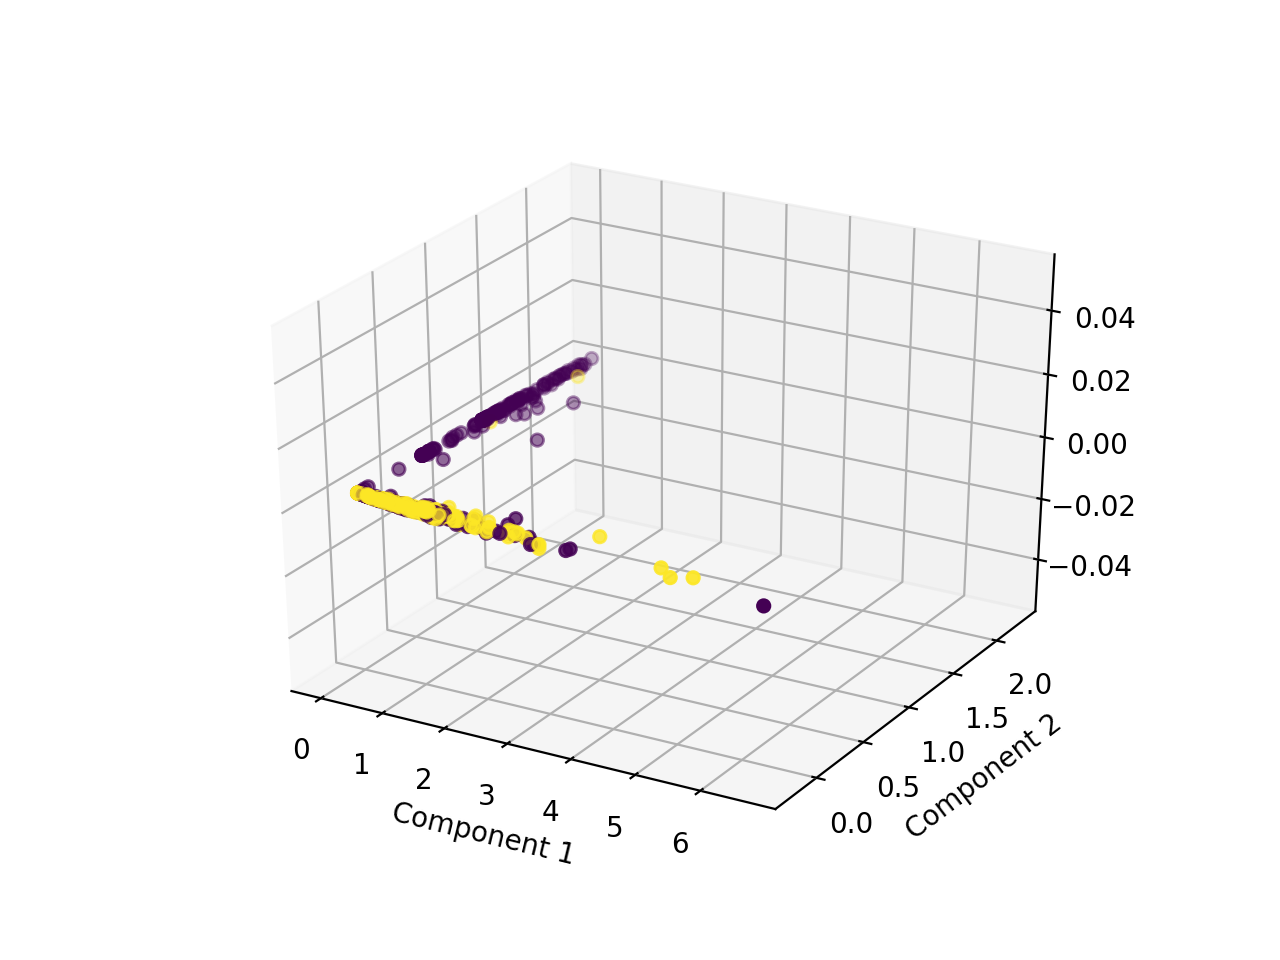

In [59]:
from sklearn.decomposition import TruncatedSVD
import utils
X_train, Y_train = utils.get_data_from_svmlight(
    "../deliverables/features_svmlight.train"
)

reduced_dimensions_X_train = TruncatedSVD(40).fit_transform(X_train)
reduced_dimensions_X_train_plot = plt.figure().gca(projection='3d')
reduced_dimensions_X_train_plot.scatter(
    reduced_dimensions_X_train[:,0], 
    reduced_dimensions_X_train[:,1],
    c=Y_train
)
reduced_dimensions_X_train_plot.set_xlabel('Component 1')
reduced_dimensions_X_train_plot.set_ylabel('Component 2')

plt.draw()

In [55]:
run_model(
    RandomForestClassifier(n_estimators=100),
    pd.DataFrame(reduced_dimensions_X_train),
    pd.Series(Y_train)
)

Result against this iteration split --->
(0.70574162679425834, 0.69550619834710758)
Result against this iteration split --->
(0.72966507177033491, 0.71871840094062311)
Result against this iteration split --->
(0.71291866028708128, 0.72006686459918678)
Result against this iteration split --->
(0.70095693779904311, 0.68654761904761907)
Result against this iteration split --->
(0.70334928229665072, 0.6926252397950512)
Average results --->
0.710526315789 0.702692864546


In [56]:
run_model(
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    pd.DataFrame(reduced_dimensions_X_train),
    pd.Series(Y_train)
)

Result against this iteration split --->
(0.70095693779904311, 0.6748333333333334)
Result against this iteration split --->
(0.69617224880382778, 0.67836134453781516)
Result against this iteration split --->
(0.68899521531100483, 0.66807310192567149)
Result against this iteration split --->
(0.67464114832535882, 0.64837398373983735)
Result against this iteration split --->
(0.65550239234449759, 0.62147109660072974)
Average results --->
0.683253588517 0.658222572027


<IPython.core.display.Javascript object>


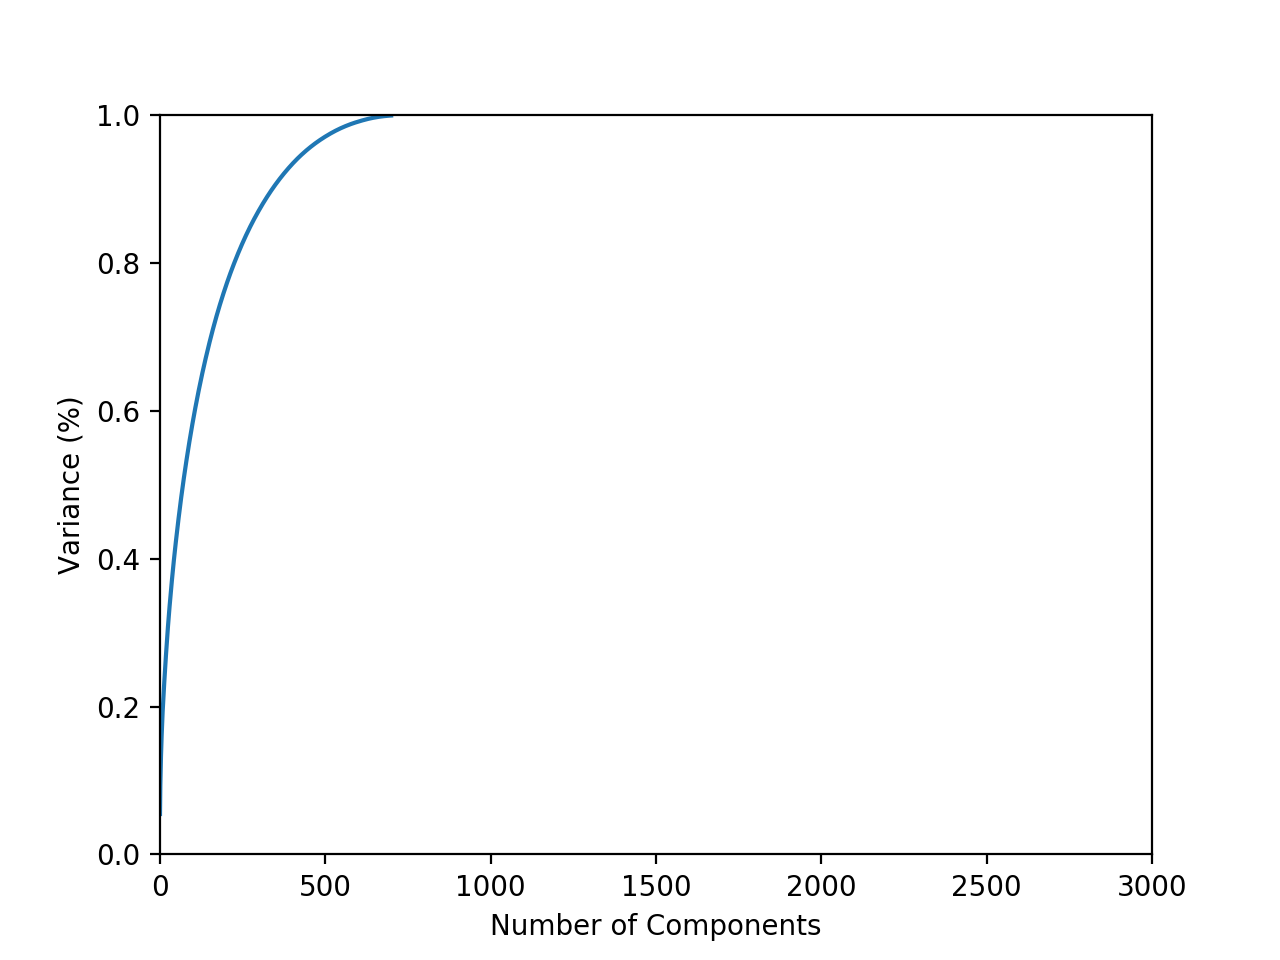

In [60]:
import numpy as np
from sklearn.decomposition import PCA
truncated_svd = TruncatedSVD(700).fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(truncated_svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.xlim([0, 3000])
plt.ylim([0, 1])
plt.show()

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
run_model(
    SGDClassifier(),
    pd.DataFrame(reduced_dimensions_X_train),
    pd.Series(Y_train)
)

Result against this iteration split --->
(0.67942583732057416, 0.60442673324371032)
Result against this iteration split --->
(0.70334928229665072, 0.7062742248062015)
Result against this iteration split --->
(0.66507177033492826, 0.5820582277863191)
Result against this iteration split --->
(0.65789473684210531, 0.62865497076023391)
Result against this iteration split --->
(0.64832535885167464, 0.69427971789052401)
Average results --->
0.670813397129 0.643138774897


/Users/aparagas/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
